Analise de ação da bolsa

Install Packages

In [1]:
!pip install seaborn
!pip install openpyxl

Import libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read base

In [19]:
basepetr4 = pd.read_excel("basepetr4.xlsx")

Leitura somente das primeiras linhas

In [20]:
print(basepetr4.head())

                 Date  abertura  maxima  minimo  fechamento    volume
0 2020-01-02 16:56:00     30.51   30.70   30.31       30.70  37774500
1 2020-01-03 00:00:00     30.88   31.24   30.45       30.45  71595600
2 2020-01-07 16:56:00     30.82   30.88   30.47       30.69  32822000
3 2020-01-08 16:56:00     30.69   30.77   30.24       30.50  48215600
4 2020-01-09 16:56:00     30.47   30.62   30.25       30.40  36102700


Buscando cotações de fechamento apenas da PETR4 e chamando os dados em petr4

In [21]:
petr4 = basepetr4['fechamento']

Leitura dos dados iniciais

In [23]:
print(petr4.head())

0    30.70
1    30.45
2    30.69
3    30.50
4    30.40
Name: fechamento, dtype: float64


Plotando em gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

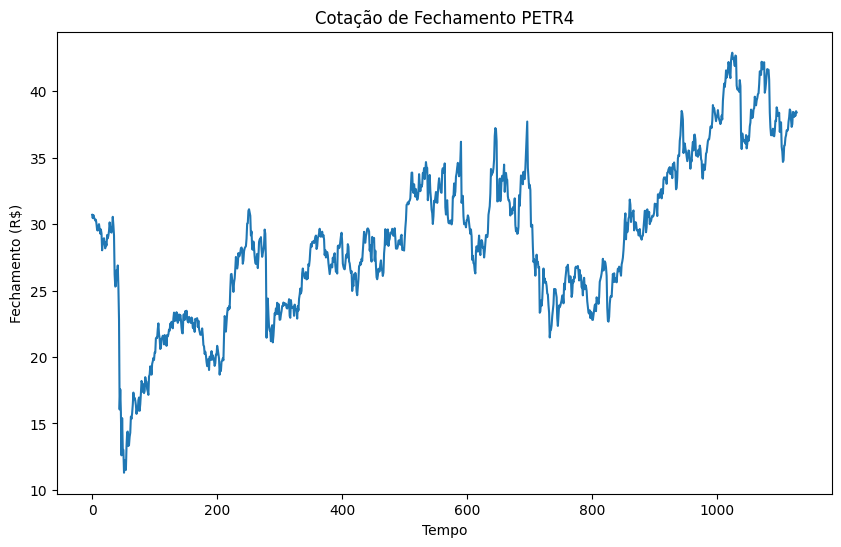

In [24]:
plt.figure(figsize=(10,6))
plt.plot(petr4)
plt.title("Cotação de Fechamento PETR4")
plt.xlabel("Tempo")
plt.ylabel("Fechamento (R$)")
plt.show

Definindo petr4 como uma serie temporal

In [25]:
petr4_ts = pd.Series(petr4.values, index=pd.to_datetime(basepetr4['Date']))

Quantas cotações existem cadastradas?

In [26]:
print(len(petr4_ts))

1128


Gráfico como serie de tempo usando o Plotly 

<function matplotlib.pyplot.show(close=None, block=None)>

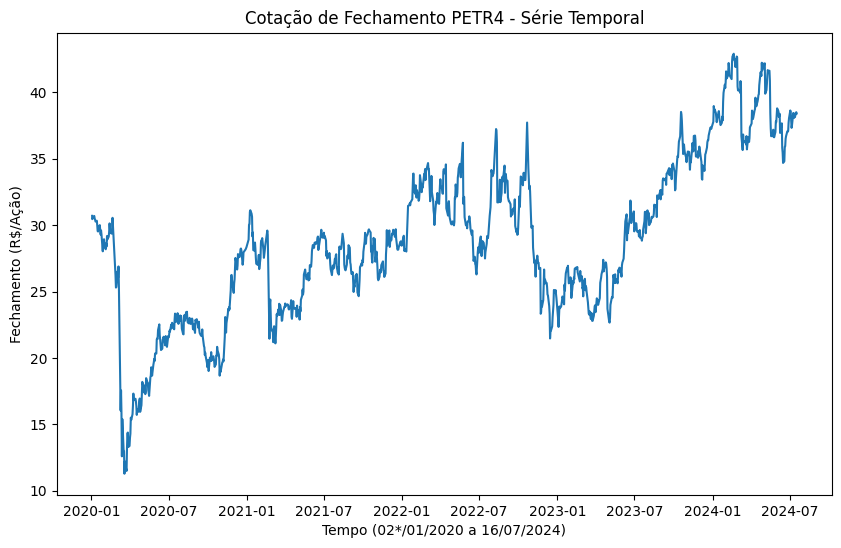

In [28]:
plt.figure(figsize=(10,6))
plt.plot(petr4_ts)
plt.title("Cotação de Fechamento PETR4 - Série Temporal")
plt.xlabel("Tempo (02*/01/2020 a 16/07/2024)")
plt.ylabel("Fechamento (R$/Ação)")
plt.show

Considerand as demais informações de base de dados basepetr4

In [29]:
volume = basepetr4['volume']
minimo = basepetr4['minimo']
abertura = basepetr4['abertura']

Colocando os dados em forma de Matriz com todos os dados no conjunto

In [37]:
dados1 = pd.concat([petr4, volume, minimo, abertura], axis=1)
dados1.columns = ['Fechamento R$', 'Volume Financ. Neg', 'Mi­nimo R$', 
                  'Abertura R$']

Plotando os gráficos

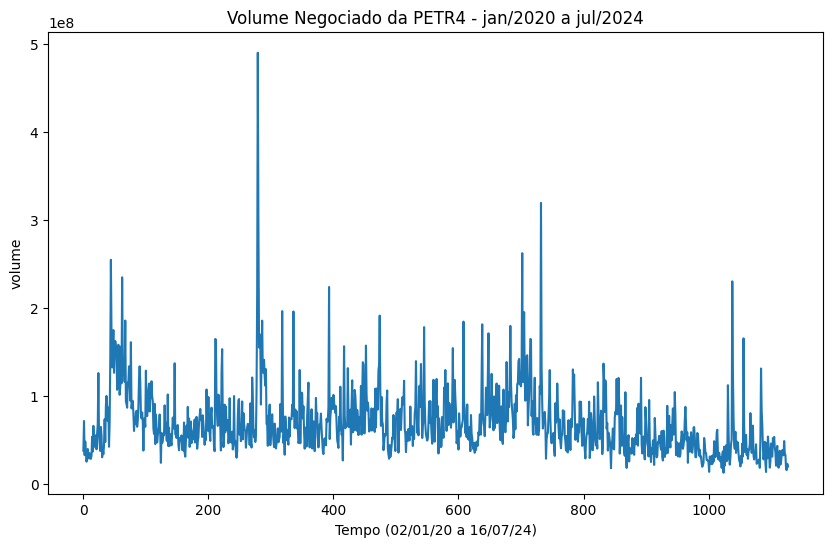

In [31]:
plt.figure(figsize=(10,6))
plt.plot(dados1['volume financ. Neg'])
plt.title('Volume Negociado da PETR4 - jan/2020 a jul/2024')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('volume')
plt.show()

Construindo uma janela cmo 4 gráficos

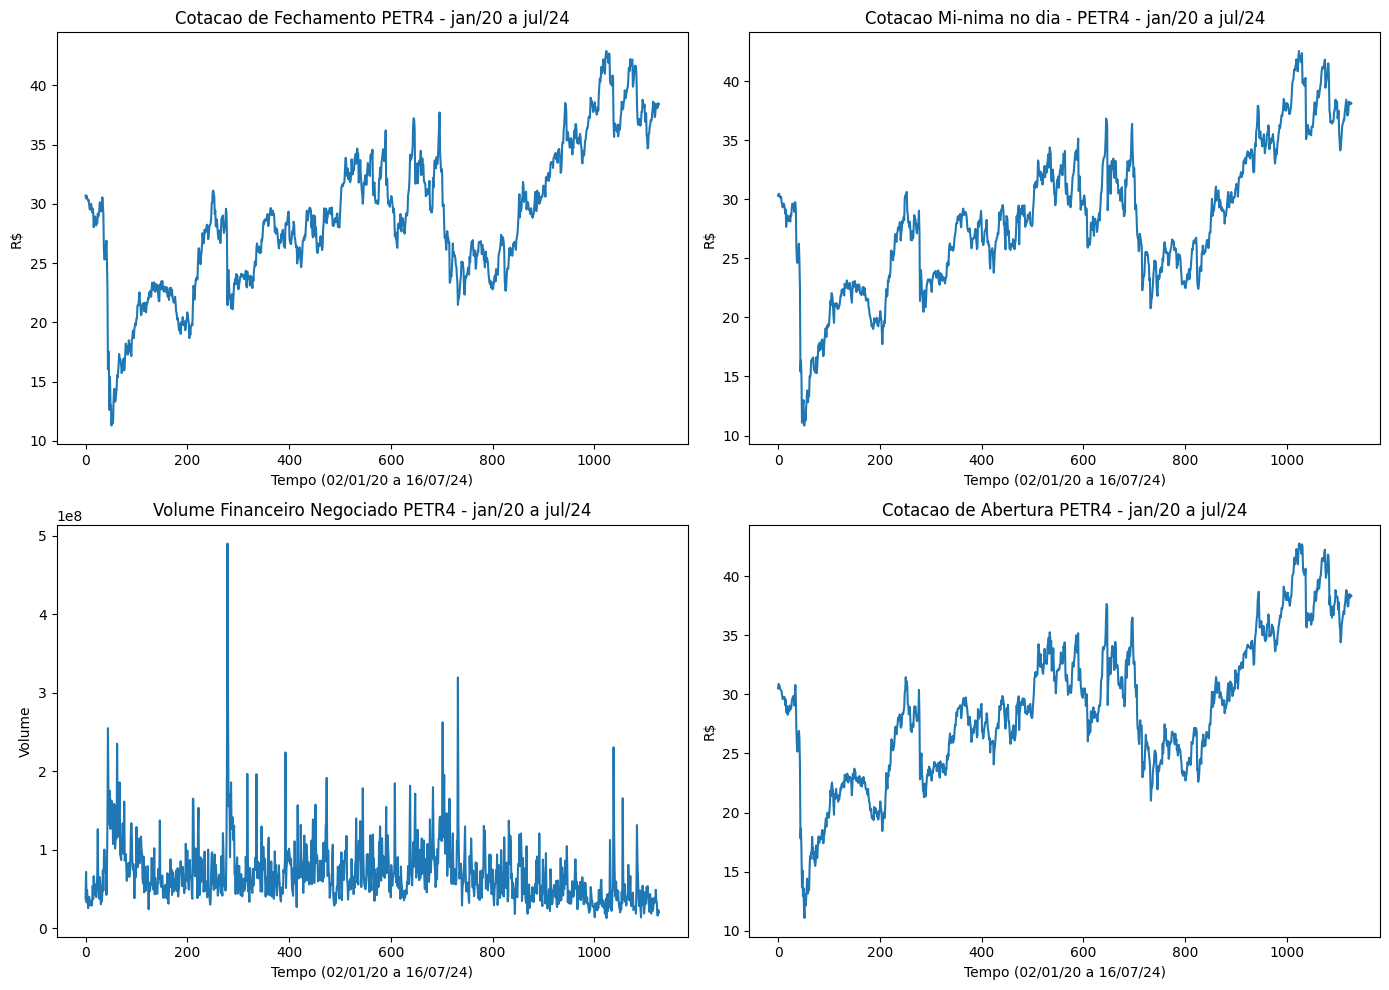

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(dados1['Fechamento R$'])
axs[0, 0].set_title('Cotacao de Fechamento PETR4 - jan/20 a jul/24')
axs[0, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 0].set_ylabel('R$')

axs[0, 1].plot(dados1['Mi­nimo R$'])
axs[0, 1].set_title('Cotacao Mi­nima no dia - PETR4 - jan/20 a jul/24')
axs[0, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 1].set_ylabel('R$')

axs[1, 0].plot(dados1['Volume Financ. Neg'])
axs[1, 0].set_title('Volume Financeiro Negociado PETR4 - jan/20 a jul/24')
axs[1, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 0].set_ylabel('Volume')

axs[1, 1].plot(dados1['Abertura R$'])
axs[1, 1].set_title('Cotacao de Abertura PETR4 - jan/20 a jul/24')
axs[1, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 1].set_ylabel('R$')

plt.tight_layout()
plt.show()

Como forma de alternativa, usar o Yahoo FInance

Instalar e carregar bibliotecas

In [5]:
!pip install yfinance
import yfinance as yf

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/a2/1d/1a35edd6943f27ff4b5e2d6ba634e7d1bac2e6f815f8efae0666ac71a68d/yfinance-0.2.46-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     ---- --------------------------------- 112.6/939.5 kB 3.3 MB/s eta 0:00:01
     ------- ------------------------------ 194.6/939.5 kB 2.0 MB/s eta 0:00:01
     --------- ---------------------------- 235.5/939.5 kB 2.4 MB/s eta 0:00:01
     --------- ---------------------------- 235.5/

Esfecifíca o ticker do ativo desejado (neste caso, PETR4)

In [6]:
ticker = "PETR4.SA"

Define o intervalo de datas desejado

In [7]:
start_date = "2022-01-01"
end_date = "2024-07-24"

Obtendo dados do Yahoo Finance

In [8]:
data = yf.download(ticker,start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                      PETR4.SA   PETR4.SA   PETR4.SA   PETR4.SA   
Date                                                                    
2022-01-03 00:00:00+00:00  12.382775  29.090000  29.219999  28.530001   
2022-01-04 00:00:00+00:00  12.429599  29.200001  29.400000  28.910000   
2022-01-05 00:00:00+00:00  11.948590  28.070000  29.270000  27.940001   
2022-01-06 00:00:00+00:00  11.940075  28.049999  28.650000  27.840000   
2022-01-07 00:00:00+00:00  11.995415  28.180000  28.290001  27.820000   

Price                           Open    Volume  
Ticker                      PETR4.SA  PETR4.SA  
Date                                            
2022-01-03 00:00:00+00:00  28.540001  52704700  
2022-01-04 00:00:00+00:00  29.160000  51739200  
2022-01-05 00:00:00+00:00  29.190001  78459800  
2022-01-06 00:00:00+00:00  28.290001  61163100  
2022-01-07 00:00:00+00:00  28.110001  47507600  


Salva dados em um arquivo .csv

In [48]:
csv_file_path = "dados_petroleo_novo.csv"
data.to_csv(csv_file_path)

Função para baixar os dados do Yahoo Finance

In [84]:
def obter_dados(ticker, start_date,end_date):
    data = pd.DataFrame(yf.download(ticker,start=start_date, end=end_date))
    # Resetando o índice para transformar o índice 'Date' em uma coluna
    data.reset_index(inplace=True)

    return data

Gráfico

In [143]:
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Open'].values
    n = np.size(data['Open'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Low'].values
    n = np.size(data['Low'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[1].plot(data['Low'], label='Mi­nima', color='green')
    axs[1].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['High'].values
    n = np.size(data['High'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

Define Ticker, data de inicio, data de fim e mandar rodar a função para buscar os dados e plotar no gráfico

[*********************100%***********************]  1 of 1 completed


******************************************************************
Ação: VALE
Datas entre: 2022-01-01 e 2024-10-20


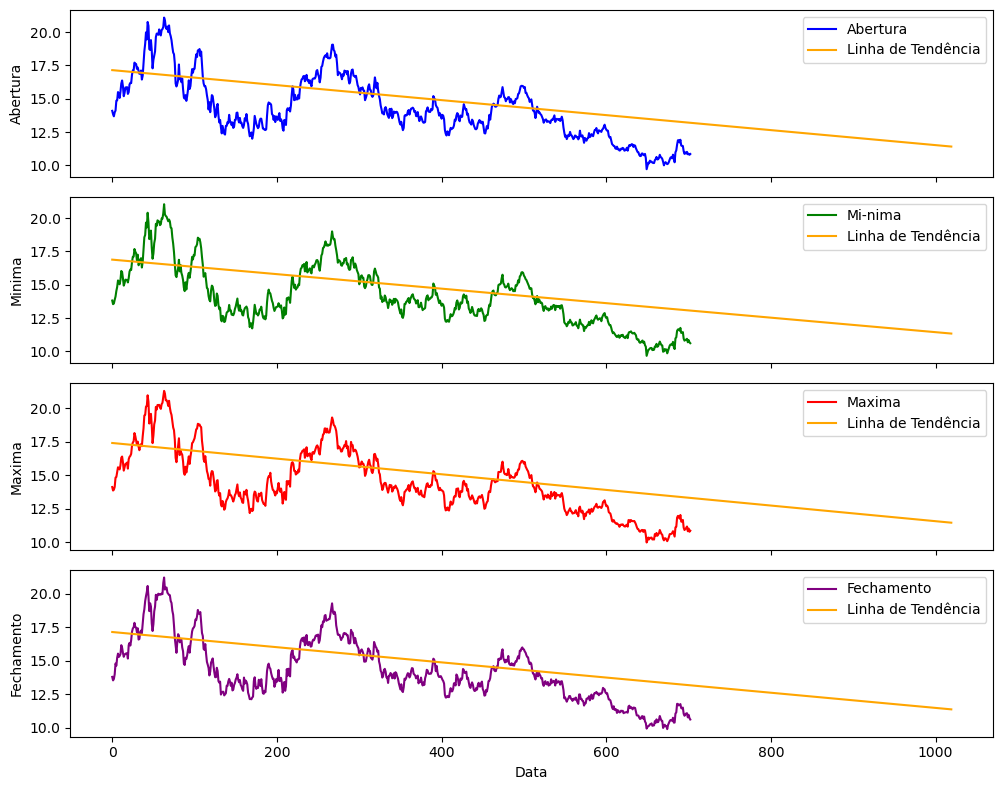

******************************************************************


[*********************100%***********************]  1 of 1 completed


******************************************************************
Ação: PETR3.SA
Datas entre: 2022-01-01 e 2024-10-20


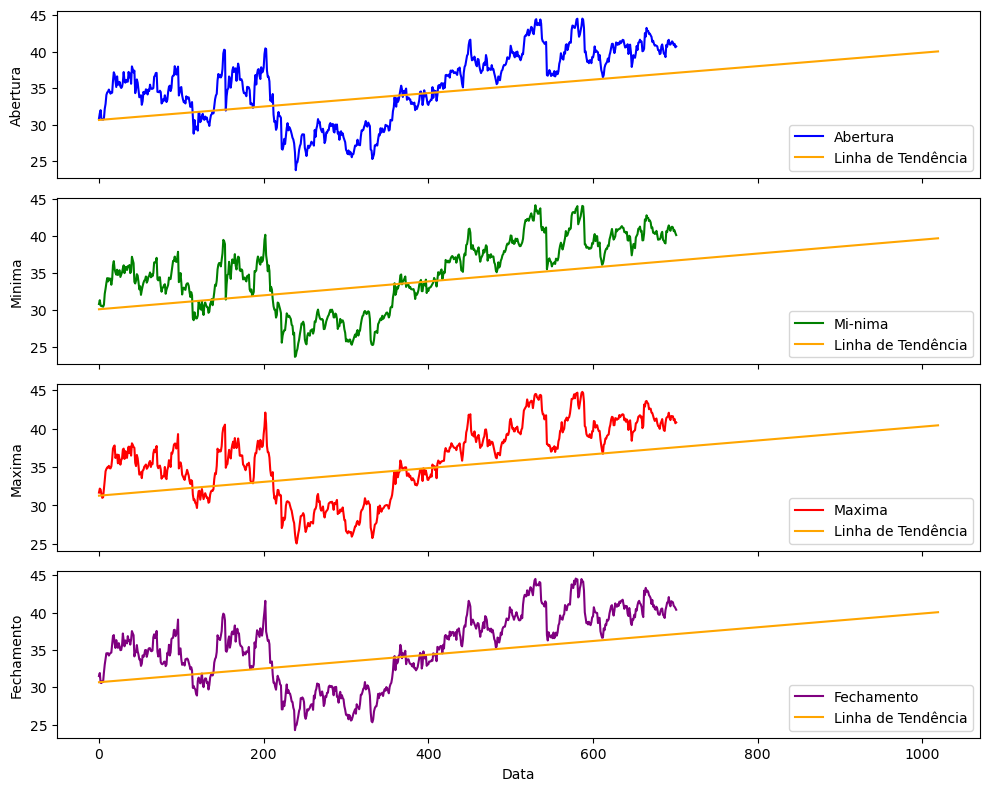

******************************************************************


[*********************100%***********************]  1 of 1 completed


******************************************************************
Ação: MGLU3.SA
Datas entre: 2022-01-01 e 2024-10-20


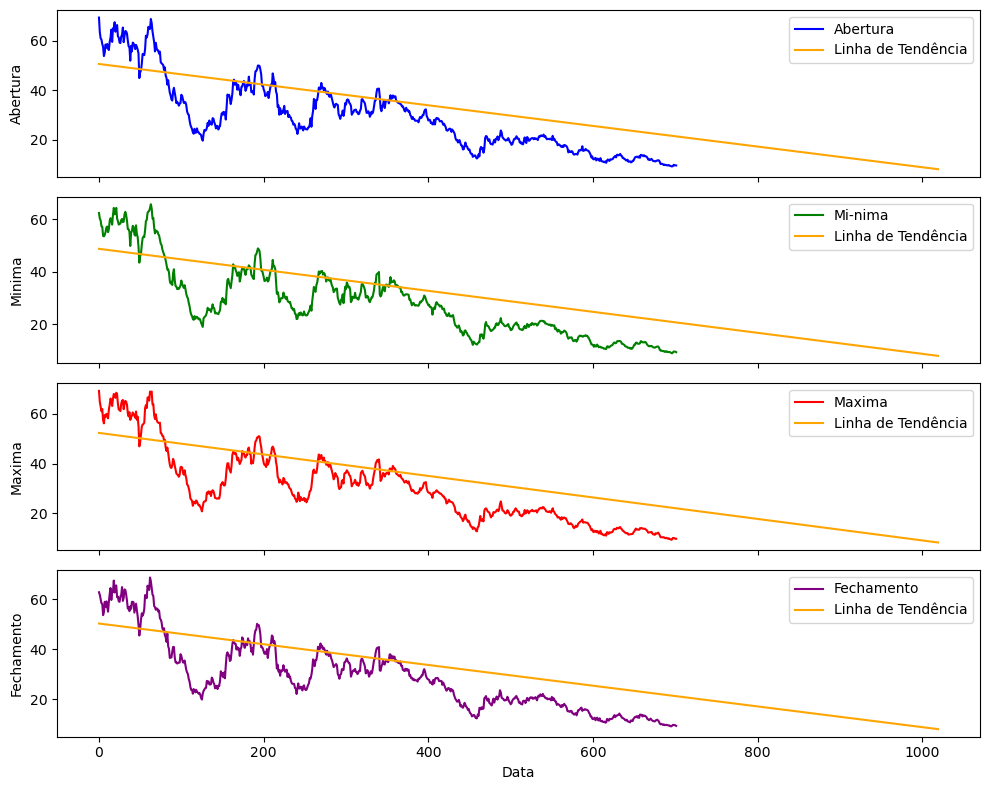

******************************************************************


[*********************100%***********************]  1 of 1 completed


******************************************************************
Ação: VALE3.SA
Datas entre: 2022-01-01 e 2024-10-20


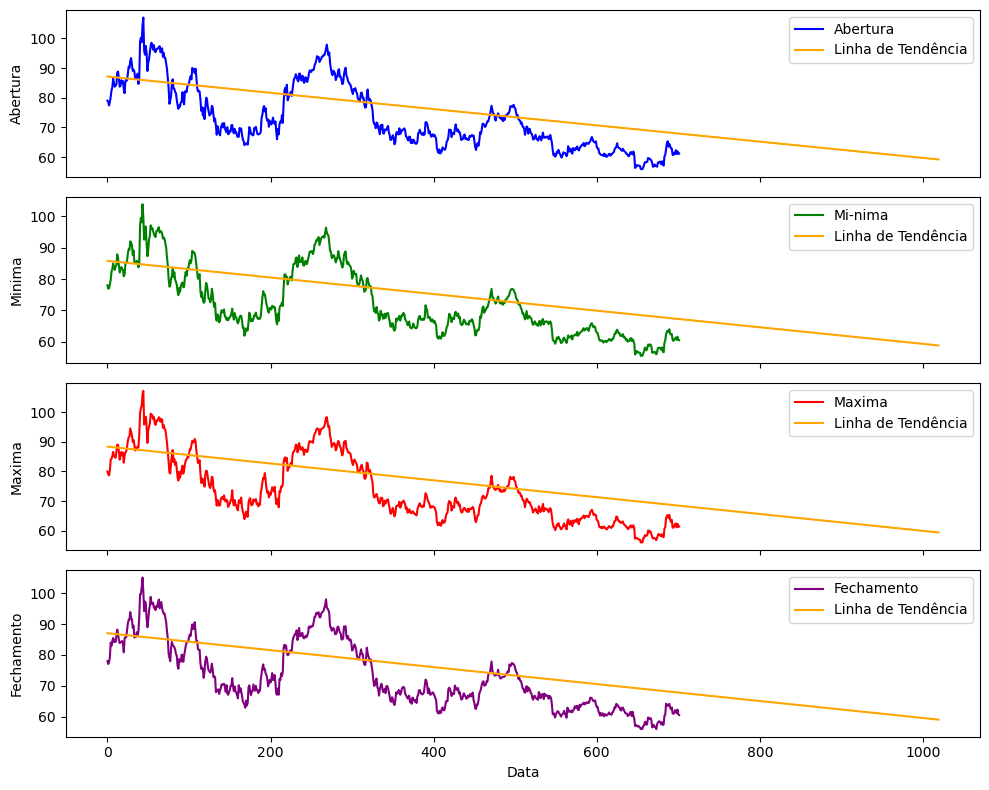

******************************************************************


In [158]:
tickers = ["VALE","PETR3.SA","MGLU3.SA","VALE3.SA"]
start_date = "2022-01-01"
end_date = "2024-10-20"

# Chamando a função do Yahoo FInance
for ticker in tickers:
    dados = obter_dados(ticker,start_date,end_date)
    print('******************************************************************')
    print(f'Ação: {ticker}') 
    print(f'Datas entre: {start_date} e {end_date}')
    plotar_graficos(dados)
    print('******************************************************************')